## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [0]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [260]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [261]:
absent.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categeoricla variables that are correlated, keep the one with fewer values.

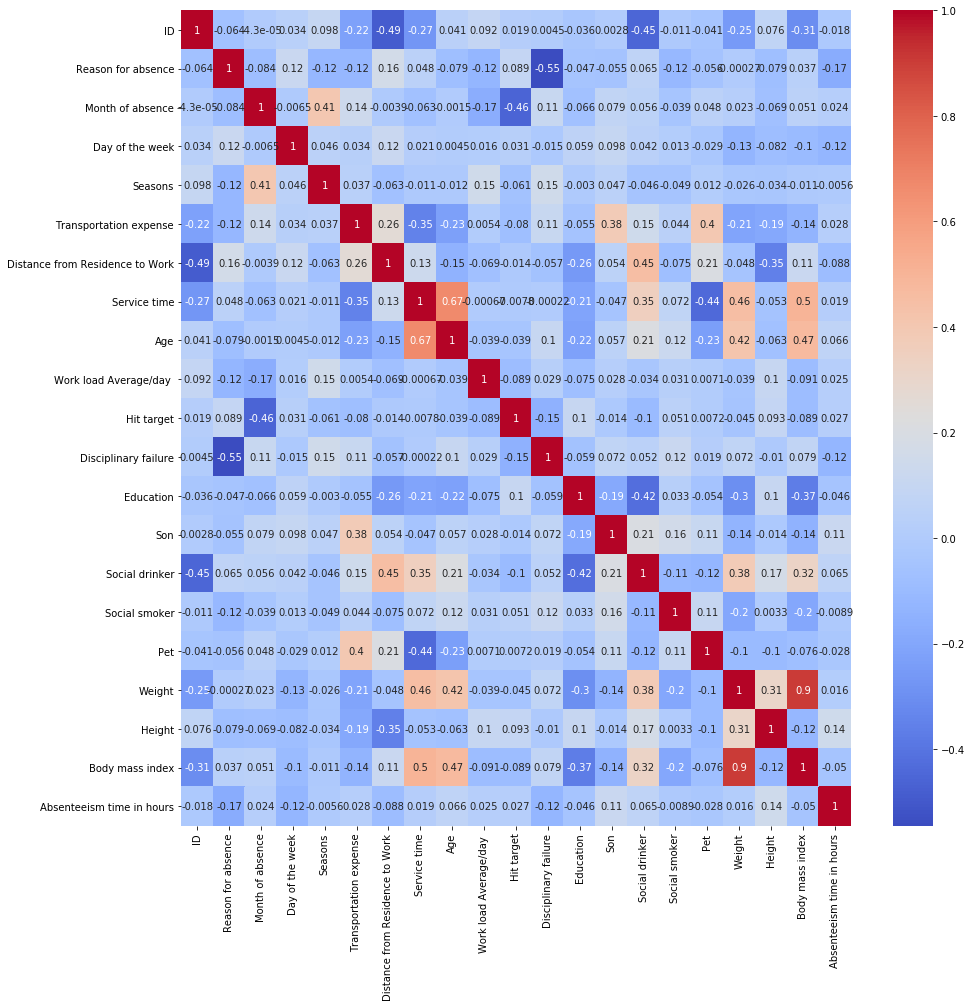

In [262]:
import seaborn as sns

plt.figure(figsize=[15, 15])
sns.heatmap(absent.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()

In [0]:
# remove variables
absent.drop(['Height', 'Month of absence', 'Weight'], axis=1, inplace=True)

In [0]:
# answer below:
def remove_correlated_features(dataset, target, threshold):
    col_corr = set()
    corr_matrix = dataset.drop(target, axis=1).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f'Deleted {colname} from dataset.')
                    del dataset[colname]
    return dataset

In [265]:
target= 'Absenteeism time in hours'
remove_correlated_features(absent, target, .6)

Deleted Age from dataset.


,ID,Reason for absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,11,26,3,1,289,36,13,239.554,97,0,1,2,1,0,1,30,4
1,36,0,3,1,118,13,18,239.554,97,1,1,1,1,0,0,31,0
2,3,23,4,1,179,51,18,239.554,97,0,1,0,1,0,0,31,2
3,7,7,5,1,279,5,14,239.554,97,0,1,2,1,1,0,24,4
4,11,23,5,1,289,36,13,239.554,97,0,1,2,1,0,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,3,1,289,36,13,264.604,93,0,1,2,1,0,1,30,8
736,1,11,3,1,235,11,14,264.604,93,0,3,1,0,0,1,29,4
737,4,0,3,1,118,14,13,271.219,95,0,1,1,1,0,8,34,0
738,8,0,4,2,231,35,14,271.219,95,0,1,2,1,0,2,35,0


Find out which columns contain categorical variables and turn those into dummy variables.

In [266]:
# answer below:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 17 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                                740 non-null int64
Body mass index                    740 non-null int64
Absenteeism time in hours    

In [267]:
def get_categorical_columns(df, unique_thresh=10):
    columns = []
    for col in df.columns:
        if df[col].nunique() < unique_thresh:
            columns.append(col)
    return columns

get_categorical_columns(absent)

['Day of the week',
 'Seasons',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet']

In [268]:
# make list of cat columns
cat= get_categorical_columns(absent)

absent[cat]= absent[cat].astype('object')

# get dummies for categorical 

dums= pd.get_dummies(absent[cat], drop_first=True)
dums.head()

,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Seasons_2,Seasons_3,Seasons_4,Disciplinary failure_1,Education_2,Education_3,Education_4,Son_1,Son_2,Son_3,Son_4,Social drinker_1,Social smoker_1,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0


In [0]:
# drop cat from df
absent.drop(cat, axis=1, inplace=True)

In [270]:
# append to rest of data
abs_ft= pd.concat([absent, dums], axis=1)
abs_ft

,ID,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Body mass index,Absenteeism time in hours,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Seasons_2,Seasons_3,Seasons_4,Disciplinary failure_1,Education_2,Education_3,Education_4,Son_1,Son_2,Son_3,Son_4,Social drinker_1,Social smoker_1,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8
0,11,26,289,36,13,239.554,97,30,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,36,0,118,13,18,239.554,97,31,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3,23,179,51,18,239.554,97,31,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,7,7,279,5,14,239.554,97,24,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
4,11,23,289,36,13,239.554,97,30,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,289,36,13,264.604,93,30,8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
736,1,11,235,11,14,264.604,93,29,4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
737,4,0,118,14,13,271.219,95,34,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
738,8,0,231,35,14,271.219,95,35,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [0]:
# answer below:
#Split the data into train and test with test containing 20% of the data.
from sklearn.model_selection import train_test_split

X= abs_ft.drop('Absenteeism time in hours', axis=1)
Y= abs_ft['Absenteeism time in hours']

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=.2, random_state=679)


In [272]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [273]:
print(knn.score(X_train, Y_train))
print(knn.score(X_test, Y_test))

0.14931142586811252
-0.035494433607924814


In [0]:
train_scores = []
test_scores = []

k_list = [1, 3, 5, 15, 20, 50, 100]

for k in k_list:
    neighbors = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    neighbors.fit(X_train, Y_train)
    train_scores.append(neighbors.score(X_train, Y_train))
    test_scores.append(neighbors.score(X_test, Y_test))

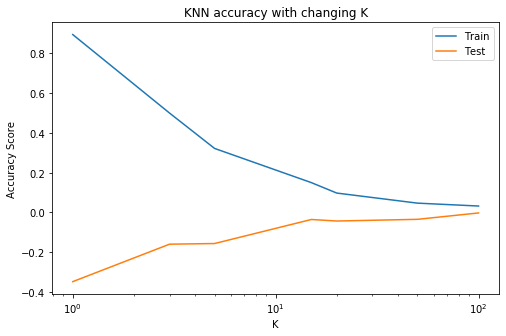

In [275]:
plt.figure(figsize=(8, 5))
plt.plot(k_list, train_scores, label='Train')
plt.plot(k_list, test_scores, label='Test')
plt.legend()
plt.title('KNN accuracy with changing K')
plt.xscale('log')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()

Train a KNN regression model using k=15 and compute the MSE for the test subsample.

In [276]:
# answer below
from sklearn.metrics import mean_squared_error 

preds= knn.predict(X_test)
mse= mean_squared_error(preds, y_test)

mse

295.87381381381385

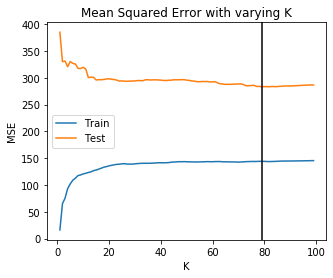

Best K: 79


In [277]:
train_errors = []
test_errors = []

k_list = np.arange(1, 100, 1)
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_train_pred = knn.predict(X_train)
    Y_pred = knn.predict(X_test)
    train_errors.append(mean_squared_error(Y_train, Y_train_pred))
    test_errors.append(mean_squared_error(Y_test, Y_pred))

best_k = pd.DataFrame(test_errors, index=k_list).sort_values(by=0).index[0]

plt.figure(figsize=(5,4))
plt.plot(k_list, train_errors, label='Train')
plt.plot(k_list, test_errors, label='Test')
plt.axvline(best_k, c='k')
plt.title('Mean Squared Error with varying K')
plt.xlabel('K')
plt.ylabel('MSE')
plt.legend()
plt.show()

print('Best K: {}'.format(best_k))